# Digital Marketing Strategy
## "What determinants could videogame publishers use to improve their Customer Engagement on the social media platforms of Instagram and Facebook?"

## Set up the dataset path and import/install necessary libraries
This step shows all imports and defines the path of the dataset in one location, minimizing repetition.

In [1]:
# This is the root path where the dataset file is stored. 
dataset_path = ('/Users/jimdoves/Desktop/Master Digital Driven Business/Digital Marketing Strategy/DMS')

In [35]:
# The libaries that are used
import pandas as pd
import os
import numpy as np
import torch
from transformers import pipeline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymer4.models import Lmer

## Exploratory Data Analysis, Data Cleaning and Feature Engineering

In [3]:
# Load the datasets
FB_data = pd.read_excel(os.path.join(dataset_path, "combined_FB_datasets.xlsx"))
IG_data = pd.read_excel(os.path.join(dataset_path, "combined_IG_datasets.xlsx"))

#Display the first and the last rows of the datasets
display(FB_data.head())
display(FB_data.tail())
display(IG_data.head())
display(IG_data.tail())

#Display information about the datasets
print('Original length of FB dataframe:', len(FB_data))
print('Original length of IG dataframe:', len(IG_data))
display("There are {} rows and {} columns in the FB dataset".format(FB_data.shape[0], FB_data.shape[1]))
display("There are {} rows and {} columns in the IG dataset".format(IG_data.shape[0], IG_data.shape[1]))
display("Datatypes FB dataset:", FB_data.dtypes) 
display("Datatypes IG dataset:", IG_data.dtypes)
missing_valuesFB = FB_data.isnull().sum()
missing_valuesIG = IG_data.isnull().sum()
print("Missing values per column in the FB dataset:\n", missing_valuesFB)
print("Missing values per column in the IG dataset:\n", missing_valuesIG)

,date,message,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
0,2021-12-31 18:00:03,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,190,25,...,0,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,NaN
1,2021-12-31 16:00:03,Fungi and ferns and moths and Fireflies -- the...,"Naughty Dog, LLC",FACEBOOK,1506484,850,1138,14,14,57,...,0,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,NaN
2,2021-12-31 16:00:02,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,15,12,...,0,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,NaN
3,2021-12-31 14:00:01,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,48,106,...,0,1,0.48,0.36,0.00046,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,NaN
4,2021-12-31 13:00:17,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,164,128,...,0,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,NaN


,date,message,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
11817,2024-01-02 17:01:08,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,FACEBOOK,0,644,922,29,19,18,...,0,2,0.310345,0.206897,0.006946,0.007412,404310782934653_888976556564295,404310782934653,https://www.facebook.com/739147731547179/posts...,NaN
11818,2024-01-02 16:00:27,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,50,65,...,0,16,0.513158,0.184211,0.000932,0.00112,59916854460_982334366592098,59916854460,https://www.facebook.com/867403448085191/video...,NaN
11819,2024-01-02 15:20:29,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,800,18,...,0,1,0.316415,0.336933,0.000633,0.001092,81174647292_929205918563949,81174647292,https://www.facebook.com/820219539462588/posts...,NaN
11820,2024-01-02 13:21:51,Take caution when you're out in the wilds. \n\...,Guerrilla Games,FACEBOOK,0,280,358,1,1,3,...,0,0,-,-,0.001844,0.001879,179751088724627_920688956093823,179751088724627,https://www.facebook.com/777512863744767/posts...,NaN
11821,2024-01-01 18:04:40,New Year hype! What are you looking forward to...,Insomniac Games,FACEBOOK,0,696,1074,204,135,26,...,0,3,0.455882,0.102941,0.004428,0.005298,91127584852_754198763404083,91127584852,https://www.facebook.com/459736079517021/video...,NaN


,date,message,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
0,2021-12-31 18:00:07,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,NaN
1,2021-12-31 16:00:11,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,NaN
2,2021-12-31 14:01:05,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,NaN
3,2021-12-30 18:01:10,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,NaN
4,2021-12-30 15:09:00,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,NaN


,date,message,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
8589,2024-01-02 18:01:09,"As the New Year gets underway, we’re celebrati...",Square Enix,INSTAGRAM,1063757,14512,236,14748,1,1,0,0.01421,18022233265771192,2117884847,https://www.instagram.com/p/C1m2_7Ivi22/,NaN
8590,2024-01-02 17:00:57,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,INSTAGRAM,749452,13476,44,13520,1,1,0,0.01839,18126621253321340,51722578,https://www.instagram.com/p/C1mwHEGOaNy/,NaN
8591,2024-01-02 15:24:05,Drop in comment ??,Ubisoft,INSTAGRAM,8015932,21231,3584,24815,1,1,0,0.003026,18017000852052740,507516414,https://www.instagram.com/p/C1mlB_aNJxh/,NaN
8592,2024-01-02 13:21:55,Take caution when you're out in the wilds. \n\...,Guerrilla,INSTAGRAM,288197,1792,14,1806,1,1,0,-,17950605668726090,615720220,https://www.instagram.com/p/C1mXC4UOPTt/,NaN
8593,2024-01-01 18:05:40,New Year hype! What are you looking forward to...,Insomniac Games,INSTAGRAM,981610,62239,832,63071,1,0,1,0.063939,18033210811685080,302534790,https://www.instagram.com/reel/C1kStT7uEbq/,NaN


Original length of FB dataframe: 11822
Original length of IG dataframe: 8594


'There are 11822 rows and 29 columns in the FB dataset'

'There are 8594 rows and 16 columns in the IG dataset'

'Datatypes FB dataset:'

date                                           datetime64[ns]
message                                                object
profile                                                object
network                                                object
number of followers                                     int64
number of likes                                         int64
total likes(including positive emoji likes)             int64
number of comments                                      int64
number of comments (primary)                            int64
shares per post                                         int64
reactions, comments & shares                            int64
number of posts                                         int64
picture posts                                          object
video-posts                                            object
number of haha                                          int64
number of love                                          int64
number o

'Datatypes IG dataset:'

date                            datetime64[ns]
message                                 object
profile                                 object
network                                 object
number of followers                      int64
number of likes                          int64
number of comments                       int64
reactions, comments & shares             int64
number of posts                          int64
picture posts                            int64
video-posts                              int64
engagement                              object
message-id                               int64
profile-id                               int64
link                                    object
external links                         float64
dtype: object

Missing values per column in the FB dataset:
 date                                               0
message                                          905
profile                                            0
network                                            0
number of followers                                0
number of likes                                    0
total likes(including positive emoji likes)        0
number of comments                                 0
number of comments (primary)                       0
shares per post                                    0
reactions, comments & shares                       0
number of posts                                    0
picture posts                                      0
video-posts                                        0
number of haha                                     0
number of love                                     0
number of angry                                    0
number of care                                     0


In [4]:
# Display summary statistics for numeric columns
print("\nSummary Statistics FB dataset:")
display(FB_data.describe())
print("\nSummary Statistics IG dataset:")
display(IG_data.describe())

# Display statistics for categorical columns
categorical_colsFB = FB_data.select_dtypes(include=['object']).columns
print(f"\nStatistics categorical in FB Dataset:")
display(FB_data[categorical_colsFB].describe())
categorical_colsIG = IG_data.select_dtypes(include=['object']).columns
print(f"\nStatistics categorical in IG Dataset:")
display(IG_data[categorical_colsIG].describe())


Summary Statistics FB dataset:


,date,number of followers,number of likes,total likes(including positive emoji likes),number of comments,number of comments (primary),shares per post,"reactions, comments & shares",number of posts,number of haha,number of love,number of angry,number of care,number of sad,number of thankful,number of wow,profile-id
count,11822,1.182200e+04,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000,11822.00000,11822.0,11822.000000,11822.000000,11822.000000,11822.0,11822.000000,11822.0,11822.000000,1.182200e+04
mean,2022-11-26 00:56:32.127558656,2.515432e+06,969.448909,1437.025546,165.133395,107.548554,147.251988,1776.20851,1.0,53.902724,394.144815,9.634495,0.0,17.163086,0.0,19.529098,6.251111e+13
min,2020-12-31 23:00:04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5.175254e+10
25%,2021-12-22 16:37:36.500000,2.758880e+05,128.000000,166.000000,12.000000,9.000000,7.000000,206.00000,1.0,0.000000,28.000000,0.000000,0.0,0.000000,0.0,1.000000,5.991685e+10
50%,2022-10-22 19:25:21,1.457593e+06,345.000000,478.500000,35.000000,24.000000,20.000000,562.00000,1.0,2.000000,106.000000,0.000000,0.0,0.000000,0.0,2.000000,8.117465e+10
75%,2023-10-23 09:20:52.500000,1.793685e+06,876.750000,1230.000000,117.000000,72.000000,63.000000,1454.75000,1.0,11.000000,284.000000,2.000000,0.0,1.000000,0.0,6.000000,1.395385e+14
max,2024-12-31 17:01:05,1.390782e+07,284111.000000,557672.000000,49396.000000,35508.000000,179629.000000,787044.00000,1.0,31176.000000,231963.000000,7913.000000,0.0,99051.000000,0.0,40120.000000,4.043108e+14
std,NaN,3.725357e+06,4683.057792,8134.297878,845.617866,595.231750,2174.537225,11067.92452,0.0,461.507951,3148.439154,116.800360,0.0,944.372162,0.0,407.724600,1.063489e+14



Summary Statistics IG dataset:


,date,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,message-id,profile-id,external links
count,8594,8.594000e+03,8.594000e+03,8594.000000,8.594000e+03,8594.0,8594.000000,8594.000000,8.594000e+03,8.594000e+03,0.0
mean,2023-01-10 10:52:48.036886528,4.203363e+06,3.037486e+04,410.154759,3.078502e+04,1.0,0.756342,0.243658,1.800790e+16,8.713148e+08,NaN
min,2020-12-31 23:00:07,6.348800e+04,0.000000e+00,0.000000,0.000000e+00,1.0,0.000000,0.000000,1.784222e+16,4.624896e+07,NaN
25%,2022-01-17 14:35:51.500000,8.078050e+05,3.051250e+03,34.000000,3.084250e+03,1.0,1.000000,0.000000,1.791867e+16,1.845957e+08,NaN
50%,2022-12-09 17:23:50,1.059895e+06,8.841000e+03,103.000000,8.959500e+03,1.0,1.000000,0.000000,1.797639e+16,5.075164e+08,NaN
75%,2024-01-31 09:08:24.750000128,1.352000e+06,2.894400e+04,321.000000,2.933075e+04,1.0,1.000000,0.000000,1.804537e+16,1.593309e+09,NaN
max,2024-12-31 17:01:07,2.928702e+07,6.774984e+06,102757.000000,6.877741e+06,1.0,1.000000,1.000000,1.848201e+16,2.117885e+09,NaN
std,NaN,7.880590e+06,1.170898e+05,1845.953005,1.188198e+05,0.0,0.429314,0.429314,1.269071e+14,8.150569e+08,NaN



Statistics categorical in FB Dataset:


,message,profile,network,picture posts,video-posts,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,link,external links
count,10917,11822,11822,11822,11822,11822,11822,11822,11822,11822,11822,180
unique,10838,11,1,2,2,3248,3172,11492,11500,11822,11822,178
top,??,Square Enix,FACEBOOK,1,-,-,0,-,-,91127584852_10160103901729853,https://www.facebook.com/insomniacgames/photos...,https://www.gamingheads.com/jak-3-statue.html
freq,8,3014,11822,7635,8080,1371,1431,269,269,1,1,2



Statistics categorical in IG Dataset:


,message,profile,network,engagement,link
count,8564,8594,8594,8594,8594
unique,8516,11,1,7790,8594
top,Drop in comment ??,Square Enix,INSTAGRAM,-,https://www.instagram.com/p/CYKA__hjRC2/
freq,7,2039,8594,803,1


#### Rename the column `message` to `caption`

In [5]:
FB_data.rename(columns={"message": "caption"}, inplace=True)
IG_data.rename(columns={"message": "caption"}, inplace=True)

#### Splitting the column `Date` in Date and Time and add the column `Day` which contains the name of the day of the week.

In [6]:
# Splitting the column `Date` in date and time

# First ensuring that `date` the datatype datetime is:
FB_data["date"] = pd.to_datetime(FB_data["date"], errors="coerce")
IG_data["date"] = pd.to_datetime(IG_data["date"], errors="coerce")

# Create separate columns for date, time and day of the week(FB)
FB_data['day'] = FB_data['date'].dt.day_name()
FB_data['time'] = FB_data['date'].dt.time
FB_data['date'] = FB_data['date'].dt.date

# Create separate columns for date,time and day of the week (IG)
IG_data['day'] = IG_data['date'].dt.day_name()
IG_data['time'] = IG_data['date'].dt.time
IG_data['date'] = IG_data['date'].dt.date

# Set the new columns in the right sequence
FB_data = FB_data[["date", "time", "day"] + [col for col in FB_data.columns if col not in ["date", "time", "day"]]]
IG_data = IG_data[["date", "time", "day"] + [col for col in IG_data.columns if col not in ["date", "time", "day"]]]

# Check the results
print("FB dataset:")
display(FB_data.head())

print("IG dataset:")
display(IG_data.head())

FB dataset:


,date,time,day,caption,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,...,number of thankful,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links
0,2021-12-31,18:00:03,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,0,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,NaN
1,2021-12-31,16:00:03,Friday,Fungi and ferns and moths and Fireflies -- the...,"Naughty Dog, LLC",FACEBOOK,1506484,850,1138,14,...,0,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,NaN
2,2021-12-31,16:00:02,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,0,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,NaN
3,2021-12-31,14:00:01,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,0,1,0.48,0.36,0.00046,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,NaN
4,2021-12-31,13:00:17,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,0,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,NaN


IG dataset:


,date,time,day,caption,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links
0,2021-12-31,18:00:07,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,NaN
1,2021-12-31,16:00:11,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,NaN
2,2021-12-31,14:01:05,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,NaN
3,2021-12-30,18:01:10,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,NaN
4,2021-12-30,15:09:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,NaN


In [7]:
# Get unique gaming studios profiles
unique_studiosFB = FB_data["profile"].unique()
unique_studiosIG = IG_data["profile"].unique()

# Display unique studio names
display("Unique Gaming Studio Profiles FB:")
for profileFB in sorted(unique_studiosFB):
    print(profileFB)

display("Unique Gaming Studio Profiles IG:")
for profileIG in sorted(unique_studiosIG):
    print(profileIG)

'Unique Gaming Studio Profiles FB:'

Bethesda
CD PROJEKT RED
EA - Electronic Arts
Guerrilla Games
Insomniac Games
Naughty Dog, LLC
Obsidian Entertainment
Rockstar Games
Santa Monica Studio
Square Enix
Ubisoft


'Unique Gaming Studio Profiles IG:'

Bethesda Softworks
CD PROJEKT RED
Electronic Arts (EA)
Guerrilla
Insomniac Games
Naughty Dog
Obsidian Entertainment
Rockstar Games
Santa Monica Studio
Square Enix
Ubisoft


In [8]:
# Mapping Profilenames
profile_mapping = {
    "Bethesda Softworks": "Bethesda",
    "EA - Electronic Arts": "Electronic Arts (EA)",
    "Guerrilla": "Guerrilla Games",
    "Naughty Dog, LLC": "Naughty Dog",
}

# Standardize profile names in both datasets
FB_data["profile"] = FB_data["profile"].replace(profile_mapping)
IG_data["profile"] = IG_data["profile"].replace(profile_mapping)

# Display unique profiles again (after cleanup)
unique_studiosFB_clean = FB_data["profile"].unique()
unique_studiosIG_clean = IG_data["profile"].unique()

print("\nCleaned Unique Gaming Studio Profiles FB:")
print(sorted(unique_studiosFB_clean))

print("\nCleaned Unique Gaming Studio Profiles IG:")
print(sorted(unique_studiosIG_clean))



Cleaned Unique Gaming Studio Profiles FB:
['Bethesda', 'CD PROJEKT RED', 'Electronic Arts (EA)', 'Guerrilla Games', 'Insomniac Games', 'Naughty Dog', 'Obsidian Entertainment', 'Rockstar Games', 'Santa Monica Studio', 'Square Enix', 'Ubisoft']

Cleaned Unique Gaming Studio Profiles IG:
['Bethesda', 'CD PROJEKT RED', 'Electronic Arts (EA)', 'Guerrilla Games', 'Insomniac Games', 'Naughty Dog', 'Obsidian Entertainment', 'Rockstar Games', 'Santa Monica Studio', 'Square Enix', 'Ubisoft']


In [9]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")

Device set to use mps:0


In [10]:
categories = ["Informative", "Entertainment", "Social/Interactive", "Reward-Based","Promotion"]

In [11]:
example_caption = "?? Deal Alert: Marvel's Spider-Man Remastered is 25% off on Steam and the Epic Game Store for a limited time! Get it for you or a friend - or both, before the sale ends! #BeGreater #SpiderManPC"

result = classifier(example_caption, candidate_labels=categories)
print(result)

{'sequence': "?? Deal Alert: Marvel's Spider-Man Remastered is 25% off on Steam and the Epic Game Store for a limited time! Get it for you or a friend - or both, before the sale ends! #BeGreater #SpiderManPC", 'labels': ['Promotion', 'Informative', 'Entertainment', 'Social/Interactive', 'Reward-Based'], 'scores': [0.4629518985748291, 0.2040448784828186, 0.17804428935050964, 0.1300937831401825, 0.024865178391337395]}


In [ ]:
# File name for the Pickle file
FB_pickle_file = "FB_contentpurpose.pkl"

# Check if the pickle file exist
if os.path.exists(FB_pickle_file):
    # If it exist open file
    with open(FB_pickle_file, "rb") as file:
        FB_contentpurpose = pickle.load(file)
    FB_data["contentpurpose"] = FB_contentpurpose
    print("contentpurpose for FB_data has been successfully loaded from Pickle.")
else:
    # If it does not exist, run the classifier.
    FB_data["contentpurpose"] = FB_data["caption"].apply(
        lambda x: classifier(x, candidate_labels=categories)["labels"][0] if pd.notna(x) else "Unknown"
    )

    # Save the contentpurpose column as a Pickle file
    with open(FB_pickle_file, "wb") as file:
        pickle.dump(FB_data["contentpurpose"], file)
    
    print("Contentpurpose for FB_data was successfully created and saved as Pickle.")


contentpurpose for FB_data has been successfully loaded from Pickle.


In [ ]:
# File name for the Pickle file
IG_pickle_file = "IG_contentpurpose.pkl"

# Check if the pickle file exist
if os.path.exists(IG_pickle_file):
    # If it exist open file
    with open(IG_pickle_file, "rb") as file:
        IG_contentpurpose = pickle.load(file)
    IG_data["contentpurpose"] = IG_contentpurpose
    print("contentpurpose for IG_data has been successfully loaded from Pickle.")
else:
    # If it does not exist, run the classifier.
    IG_data["contentpurpose"] = IG_data["caption"].apply(
        lambda x: classifier(x, candidate_labels=categories)["labels"][0] if pd.notna(x) else "Unknown"
    )

    # Save the contentpurpose column as a Pickle file
    with open(IG_pickle_file, "wb") as file:
        pickle.dump(IG_data["contentpurpose"], file)
    
    print("Contentpurpose for IG_data was successfully created and saved as Pickle.")

contentpurpose for IG_data has been successfully loaded from Pickle.


In [14]:
IG_data

,date,time,day,caption,profile,network,number of followers,number of likes,number of comments,"reactions, comments & shares",number of posts,picture posts,video-posts,engagement,message-id,profile-id,link,external links,contentpurpose
0,2021-12-31,18:00:07,Friday,What is the first game you are going to play i...,Insomniac Games,INSTAGRAM,597380,8190,295,8485,1,1,0,0.014204,18159887410207560,302534790,https://www.instagram.com/p/CYKA__hjRC2/,NaN,Informative
1,2021-12-31,16:00:11,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,INSTAGRAM,1208699,19992,35,20027,1,1,0,0.016569,17918878019040680,1593309399,https://www.instagram.com/p/CYJzRfyAaSI/,NaN,Informative
2,2021-12-31,14:01:05,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,INSTAGRAM,1059895,3167,79,3246,1,0,1,0.003063,17864704832649000,2117884847,https://www.instagram.com/tv/CYJlmkOhnw0/,NaN,Entertainment
3,2021-12-30,18:01:10,Thursday,It's always bad luck when a Black Cat... judo ...,Insomniac Games,INSTAGRAM,597380,42010,341,42351,1,1,0,0.070946,17902246271425140,302534790,https://www.instagram.com/p/CYHcUnih3H8/,NaN,Informative
4,2021-12-30,15:09:00,Thursday,Mammoth’s Patriot Mil-Spec is the internationa...,Rockstar Games,INSTAGRAM,21721887,156874,2163,159037,1,1,0,0.007325,18189250981149360,184595688,https://www.instagram.com/p/CYHInoNtmzo/,NaN,Informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2024-01-02,18:01:09,Tuesday,"As the New Year gets underway, we’re celebrati...",Square Enix,INSTAGRAM,1063757,14512,236,14748,1,1,0,0.01421,18022233265771192,2117884847,https://www.instagram.com/p/C1m2_7Ivi22/,NaN,Informative
8590,2024-01-02,17:00:57,Tuesday,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,INSTAGRAM,749452,13476,44,13520,1,1,0,0.01839,18126621253321340,51722578,https://www.instagram.com/p/C1mwHEGOaNy/,NaN,Informative
8591,2024-01-02,15:24:05,Tuesday,Drop in comment ??,Ubisoft,INSTAGRAM,8015932,21231,3584,24815,1,1,0,0.003026,18017000852052740,507516414,https://www.instagram.com/p/C1mlB_aNJxh/,NaN,Social/Interactive
8592,2024-01-02,13:21:55,Tuesday,Take caution when you're out in the wilds. \n\...,Guerrilla Games,INSTAGRAM,288197,1792,14,1806,1,1,0,-,17950605668726090,615720220,https://www.instagram.com/p/C1mXC4UOPTt/,NaN,Informative


In [15]:
FB_data

,date,time,day,caption,profile,network,number of followers,number of likes,total likes(including positive emoji likes),number of comments,...,number of wow,post comments positive sentiment share,post comments negative sentiment share,engagement,weighted engagement,message-id,profile-id,link,external links,contentpurpose
0,2021-12-31,18:00:03,Friday,What's the first game you're playing in 2022?,Insomniac Games,FACEBOOK,271113,728,995,203,...,1,0.305419,0.054187,0.004511,0.005444,91127584852_10160103901729853,91127584852,https://www.facebook.com/insomniacgames/photos...,NaN,Informative
1,2021-12-31,16:00:03,Friday,Fungi and ferns and moths and Fireflies -- the...,Naughty Dog,FACEBOOK,1506484,850,1138,14,...,2,0.5,0.071429,0.000803,0.000888,57327290245_10165832084200246,57327290245,https://www.facebook.com/naughtydog/photos/a.1...,NaN,Informative
2,2021-12-31,16:00:02,Friday,How did the creators of NEO: The World Ends wi...,Square Enix,FACEBOOK,1792534,237,291,24,...,1,0.458333,0.375,0.000183,0.00021,59916854460_10159833755834461,59916854460,https://www.facebook.com/SquareEnix/photos/a.1...,NaN,Informative
3,2021-12-31,14:00:01,Friday,Yesterday was a journey. Tomorrow's a new adve...,Square Enix,FACEBOOK,1792534,478,664,50,...,1,0.48,0.36,0.00046,0.000606,59916854460_10159832301434461,59916854460,https://www.facebook.com/867403448085191/video...,NaN,Entertainment
4,2021-12-31,13:00:17,Friday,Happy New Year!,CD PROJEKT RED,FACEBOOK,482793,6630,8950,214,...,3,0.565421,0.17757,0.019262,0.020235,283103815139159_4671320582984105,283103815139159,https://www.facebook.com/283103815139159/posts...,NaN,Informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,2024-01-02,17:01:08,Tuesday,"The Rules of Valhalla: Preparation \n\n""The ch...",Santa Monica Studio,FACEBOOK,0,644,922,29,...,2,0.310345,0.206897,0.006946,0.007412,404310782934653_888976556564295,404310782934653,https://www.facebook.com/739147731547179/posts...,NaN,Informative
11818,2024-01-02,16:00:27,Tuesday,Who's excited to take on new and familiar foes...,Square Enix,FACEBOOK,0,647,880,76,...,16,0.513158,0.184211,0.000932,0.00112,59916854460_982334366592098,59916854460,https://www.facebook.com/867403448085191/video...,NaN,Social/Interactive
11819,2024-01-02,15:20:29,Tuesday,what have you been playing over the holidays?,Ubisoft,FACEBOOK,0,306,381,926,...,1,0.316415,0.336933,0.000633,0.001092,81174647292_929205918563949,81174647292,https://www.facebook.com/820219539462588/posts...,NaN,Informative
11820,2024-01-02,13:21:51,Tuesday,Take caution when you're out in the wilds. \n\...,Guerrilla Games,FACEBOOK,0,280,358,1,...,0,-,-,0.001844,0.001879,179751088724627_920688956093823,179751088724627,https://www.facebook.com/777512863744767/posts...,NaN,Informative


In [16]:
# Count how often each category appears per profile
category_countsFB = FB_data.groupby(["profile", "contentpurpose"]).size().unstack(fill_value=0)
category_countsIG = IG_data.groupby(["profile", "contentpurpose"]).size().unstack(fill_value=0)

# Convert to percentages
category_percentagesFB = category_countsFB.div(category_countsFB.sum(axis=1), axis=0) * 100
category_percentagesIG = category_countsIG.div(category_countsIG.sum(axis=1), axis=0) * 100
category_percentagesFB = category_percentagesFB.round(2)
category_percentagesIG = category_percentagesIG.round(2)

# Show results
display(category_percentagesFB)
display(category_percentagesIG)

contentpurpose,Entertainment,Informative,Promotion,Reward-Based,Social/Interactive,Unknown
profile,,,,,,
Bethesda,14.32,43.88,4.85,2.08,20.09,14.78
CD PROJEKT RED,8.71,64.92,7.19,1.53,11.55,6.10
Electronic Arts (EA),13.50,31.00,2.75,0.50,14.00,38.25
Guerrilla Games,8.37,35.46,2.16,0.63,49.40,3.98
Insomniac Games,12.97,54.19,7.26,1.33,22.54,1.70
Naughty Dog,17.47,34.05,3.04,0.20,36.90,8.34
Obsidian Entertainment,20.00,48.15,2.59,0.74,17.41,11.11
Rockstar Games,10.06,38.92,2.54,30.89,11.89,5.69
Santa Monica Studio,5.88,77.88,1.41,1.18,8.71,4.94


contentpurpose,Entertainment,Informative,Promotion,Reward-Based,Social/Interactive,Unknown
profile,,,,,,
Bethesda,10.39,52.36,5.77,3.04,28.02,0.42
CD PROJEKT RED,7.98,61.03,7.51,2.35,20.19,0.94
Electronic Arts (EA),17.87,45.77,5.64,1.57,28.53,0.63
Guerrilla Games,9.49,35.53,2.76,0.77,51.45,0.00
Insomniac Games,13.95,53.45,8.49,1.52,22.29,0.30
Naughty Dog,14.37,40.07,4.91,0.47,39.72,0.47
Obsidian Entertainment,30.67,49.33,0.67,0.67,18.67,0.00
Rockstar Games,6.95,58.32,1.87,26.90,5.84,0.11
Santa Monica Studio,7.84,76.47,2.16,1.37,11.18,0.98


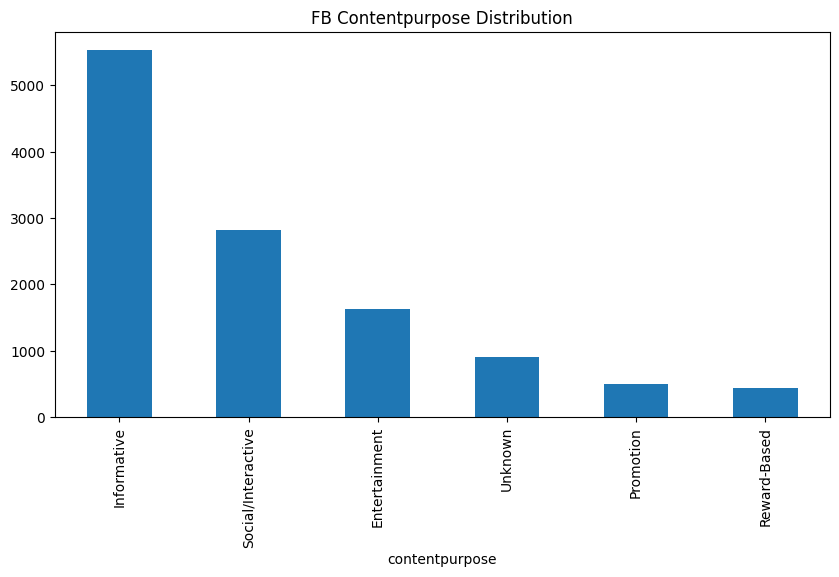

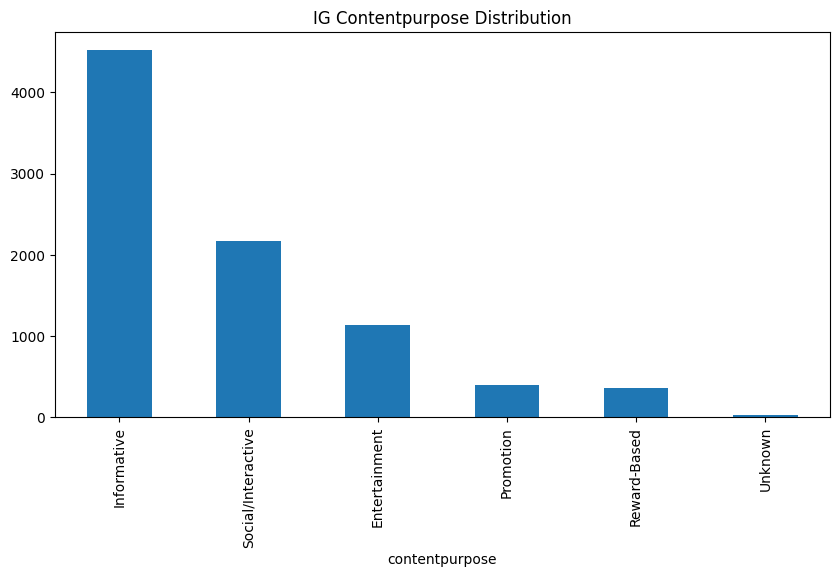

In [17]:
# FB_data contentpurpose distribution
FB_data["contentpurpose"].value_counts().plot(kind='bar', figsize=(10, 5), title="FB Contentpurpose Distribution")
plt.show()

# IG_data contentpurpose distributie
IG_data["contentpurpose"].value_counts().plot(kind='bar', figsize=(10, 5), title="IG Contentpurpose Distribution")
plt.show()


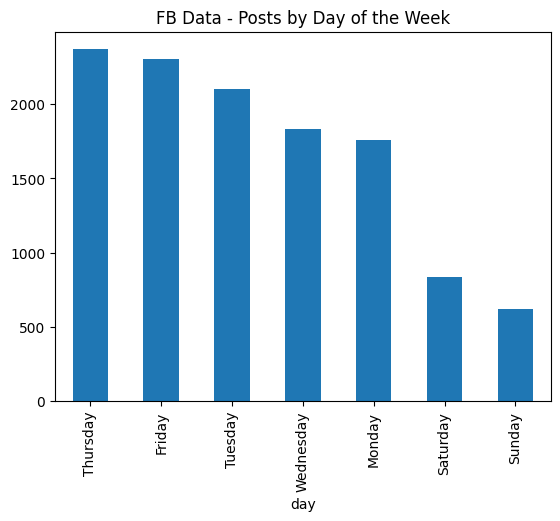

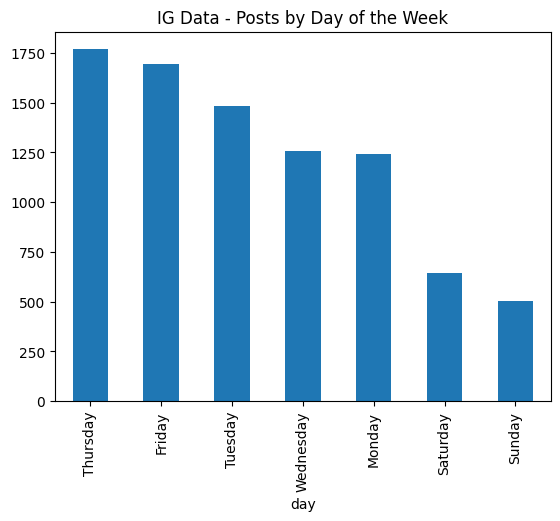

In [18]:
# Day of the week distribution
FB_data["day"].value_counts().plot(kind='bar', title="FB Data - Posts by Day of the Week")
plt.show()

IG_data["day"].value_counts().plot(kind='bar', title="IG Data - Posts by Day of the Week")
plt.show()


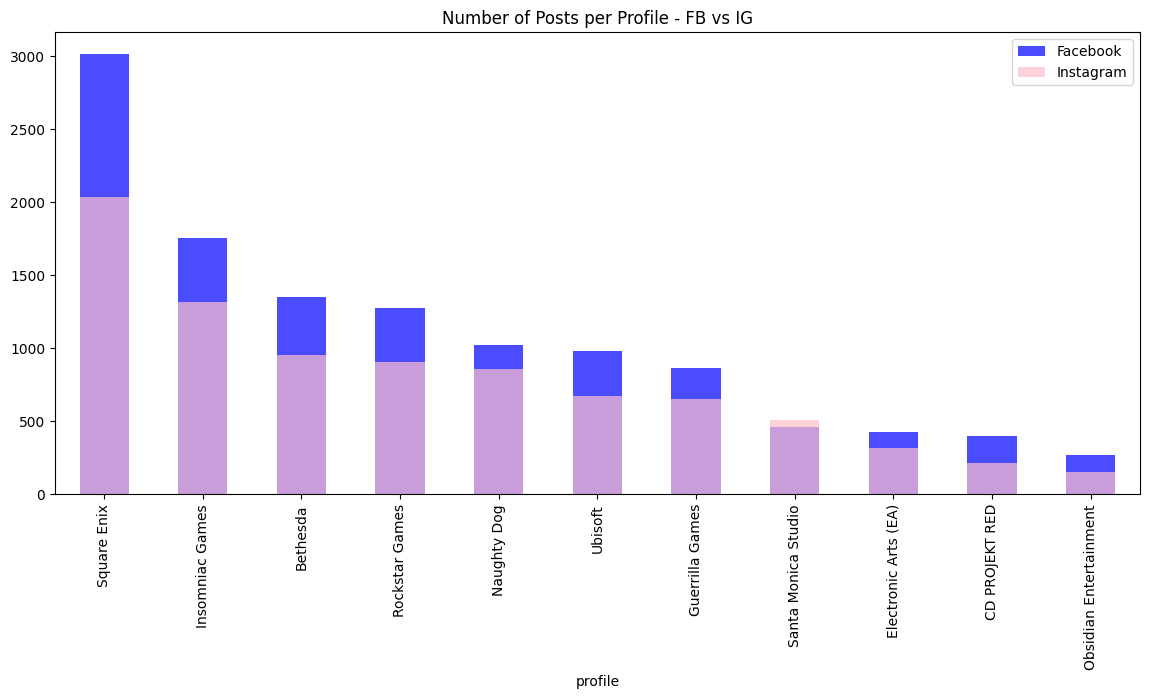

In [38]:
# Number of posts per profile by platform
FB_profiles = FB_data["profile"].value_counts()
IG_profiles = IG_data["profile"].value_counts()

# Graphic Compare
plt.figure(figsize=(14, 6))
FB_profiles.plot(kind='bar', alpha=0.7,color='blue', label='Facebook')
IG_profiles.plot(kind='bar', alpha=0.7,color='pink', label='Instagram')
plt.title("Number of Posts per Profile - FB vs IG")
plt.legend()
plt.show()


## Sub-Question 5: "What specific days and times result in the highest level of customer engagement on Facebook and Instagram?" <br>
### Hypothesis:
- H0): The day of posting on social media have no significant impact on customer engagement levels. 
- Ha): The day of posting on social media has a significant impact on customer engagement levels. <br>

- H0): The time of posting on social media have no significant impact on customer engagement levels. 
- Ha): The time of posting on social media has a significant impact on customer engagement levels. 

In [20]:
# Ensuring that day of the week is treated as a categorical variable
FB_data["day"] = FB_data["day"].astype("category")
IG_data["day"] = IG_data["day"].astype("category")

# Ensure that time (hour) is treated as a numeric value
FB_data["hour"] = pd.to_datetime(FB_data["time"], format='%H:%M:%S').dt.hour
IG_data["hour"] = pd.to_datetime(IG_data["time"], format='%H:%M:%S').dt.hour

In [32]:
FB_data.rename(columns={'number of likes': 'number_of_likes'}, inplace=True)
FB_data.rename(columns={'number of comments': 'number_of_comments'}, inplace=True)

In [21]:
from rpy2 import robjects
robjects.r('.libPaths("/opt/anaconda3/envs/DMS/lib/R/library")')

In [34]:
# Setting up the model for FB
model_fb_likes = Lmer('`number_of_likes` ~ day + (1|profile)', data=FB_data)
# model_fb_total_likes = Lmer('`total_likes` ~ day + (1|profile)', data=FB_data)
model_fb_comments = Lmer('`number_of_comments` ~ day + (1|profile)', data=FB_data)

# Model fitting
results_fb_likes = model_fb_likes.fit()
# results_fb_total_likes = model_fb_total_likes.fit()
results_fb_comments = model_fb_comments.fit()
# Show results
print("Facebook Model Results:")
print(results_fb_likes)
# print(results_fb_total_likes)
print(results_fb_comments)

/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "time". Fall back to string conversion. The error is: <class 'datetime.time'>
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "picture posts". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'int'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


Linear mixed model fit by REML [’lmerMod’]
Formula: `number_of_likes`~day+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 11822	 Groups: {'profile': 11.0}

Log-likelihood: -116394.149 	 AIC: 232806.298

Random effects:

                 Name           Var       Std
profile   (Intercept)  1.214095e+06  1101.860
Residual               2.094196e+07  4576.239

No random effect correlations specified

Fixed effects:



/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "video-posts". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'str'> and <class 'int'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "post comments positive sentiment share". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas

Linear mixed model fit by REML [’lmerMod’]
Formula: `number_of_comments`~day+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 11822	 Groups: {'profile': 11.0}

Log-likelihood: -95972.849 	 AIC: 191963.698

Random effects:

                 Name         Var      Std
profile   (Intercept)   66969.957  258.786
Residual               659975.291  812.389

No random effect correlations specified

Fixed effects:

Facebook Model Results:
              Estimate   2.5_ci   97.5_ci       SE         DF  T-stat  P-val  \
(Intercept)   1111.902  431.566  1792.238  347.117     11.416   3.203  0.008   
dayMonday      -82.549 -367.537   202.438  145.405  11807.964  -0.568  0.570   
daySaturday    -40.718 -407.152   325.716  186.959  11811.993  -0.218  0.828   
daySunday       24.303 -387.200   435.806  209.954  11813.858   0.116  0.908   
dayThursday   -263.533 -528.292     1.227  135.084  11810.960  -1.951  0.051   
dayTuesday    -140.298 -412.043   131.447  138.648  11808

/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "external links". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/opt/anaconda3/envs/DMS/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
